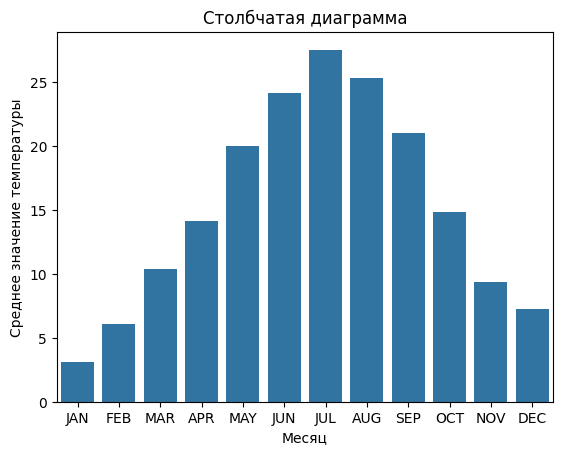

Довольно мягкий климат, отсутствуют месяцы с отрицательной средней температурой.



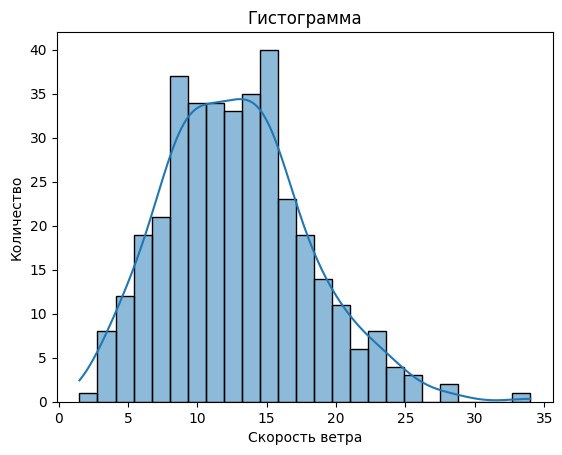

На гистограмме приведено распределение скорости ветра, близкое к нормальному, основанное на данных за 2011 год.
Наиболее часто наблюдаемаяя скорость ветра составляет 15 (скорее всего км/ч).



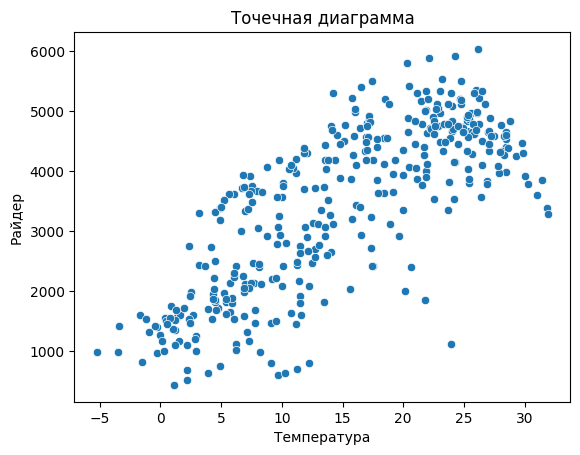

На точечной диаграмме прослеживается тренд на увеличение райдера с ростом температуры.
Однако, начиная примерно с 25 градусов рост температуры наоборот приводит к снижению райдера.



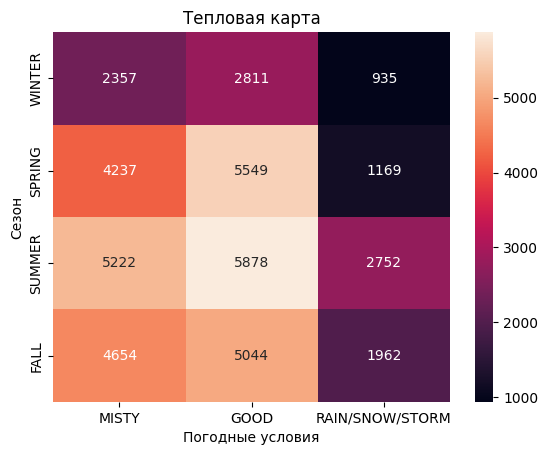

На тепловой карте визуализирован размер райдера в зависимости от сезона и погодных условий.
Как и предполагалось, наибольшее значение соответствует хорошей летней погоде, при этом весной при хороших погодных условиях оставание не существенно.


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#dataset_link="Bike Sharing Original Data.csv" # для чтения с диска
dataset_link=r"https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/Bike%20Sharing%20Original%20Data.csv" # для чтения напрямую с репозитория
df=pd.read_csv(dataset_link, sep=",")

#df.rename(columns={'Month': 'Месяц', 'Wind Speed':'Скорость ветра'}, inplace=True)

# Столбчатая диаграмма
df_barplot=df.groupby(['Month'], sort=False)['Temperature'].agg([('Avg','mean')])

#print (df_barplot)

sns.barplot(data=df_barplot, x='Month', y='Avg')
plt.title ('Столбчатая диаграмма')
plt.xlabel('Месяц')
plt.ylabel('Среднее значение температуры')
plt.show()
print ("Довольно мягкий климат, отсутствуют месяцы с отрицательной средней температурой.\n")

# Гистограмма
df_histplot=df[df['Year']==2011]['Wind Speed']
sns.histplot(data=df_histplot,bins=25, kde=True)
plt.title ('Гистограмма')
plt.xlabel('Скорость ветра')
plt.ylabel('Количество')
plt.show()
print ("На гистограмме приведено распределение скорости ветра (близкое к нормальному), основанное на данных за 2011 год.\nНаиболее часто наблюдаемаяя скорость ветра составляет 15 (скорее всего км/ч).\n")

# Точечная диаграмма
df_scatterplot=df[df['Year']==2011][['Temperature','Rider']]
#df_scatterplot
sns.scatterplot(data=df_scatterplot, x='Temperature',y='Rider')
plt.title ('Точечная диаграмма')
plt.xlabel('Температура')
plt.ylabel('Райдер')
plt.show()
print ("На точечной диаграмме прослеживается тренд на увеличение райдера с ростом температуры.\nОднако, начиная примерно с 25 градусов рост температуры наоборот приводит к снижению райдера.\n")

# Тепловая карта
df_heatmap=df.groupby(['Season','Weather Situation'], sort=False)['Rider'].agg('mean').unstack()
sns.heatmap(data=df_heatmap, annot=True, fmt='.0f')
plt.title ('Тепловая карта')
plt.xlabel('Погодные условия')
plt.ylabel('Сезон')
plt.show()
print ("На тепловой карте визуализирован размер райдера в зависимости от сезона и погодных условий.\nКак и предполагалось, наибольшее значение соответствует хорошей летней погоде, при этом весной при хороших погодных условиях оставание не существенно.")

